# Predicting loan outcomes: Some exploratory data analysis
16 Oct 2016.

In [1]:
import matplotlib

import os
import sqlite3
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 6.0)
matplotlib.rcParams['font.size'] = 16.0

## Data

In [2]:
DIR = os.getcwd() + "/../data/"
DIR

'/Users/angelaambroz/Dropbox (Personal)/_Harvard Ext School/Data Science Certificate/2016 Fall CSC E-109A/cs109a-Project/notebooks/../data/'

In [3]:
df = pd.read_csv(DIR + 'raw/lending-club-loan-data/loan.csv')
df.head()

/usr/local/lib/python2.7/site-packages/pandas-0.16.2-py2.7-macosx-10.10-x86_64.egg/pandas/io/parsers.py:1170: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print df.shape
df.info()

(887379, 74)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_sta

### OK, so loan.csv == database.sqlite

In [5]:
df['purpose'].head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

# EDA
See [here](https://www.evernote.com/l/AC4KTrr9IyRCrbVx2IGctuLbvBIpLzzchKc) for a plan:
- Histogram: interest rate
    - By grade? By loan status?
    - Infer a beta prior for all interest rates - not sure what to add to A and B though

In [52]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

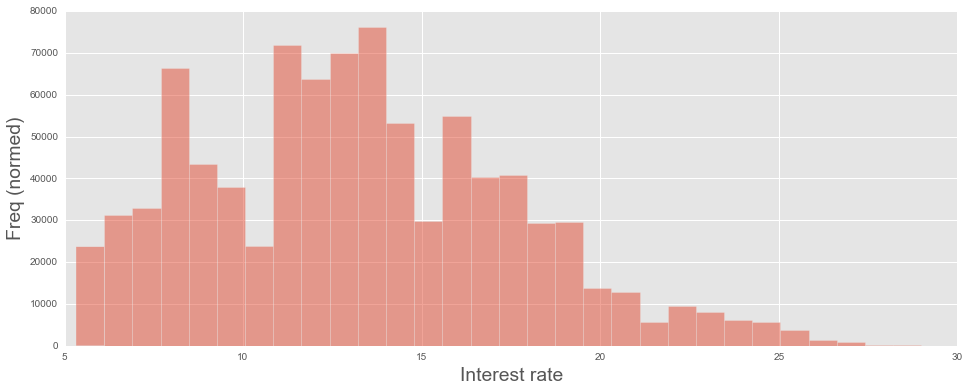

In [49]:
# Histogram: interest rate
# By grade? By loan status?

for i in 
plt.hist(df['int_rate'], bins = 30, alpha = 0.5)
plt.xlabel('Interest rate')
plt.ylabel('Freq (normed)')
plt.show()

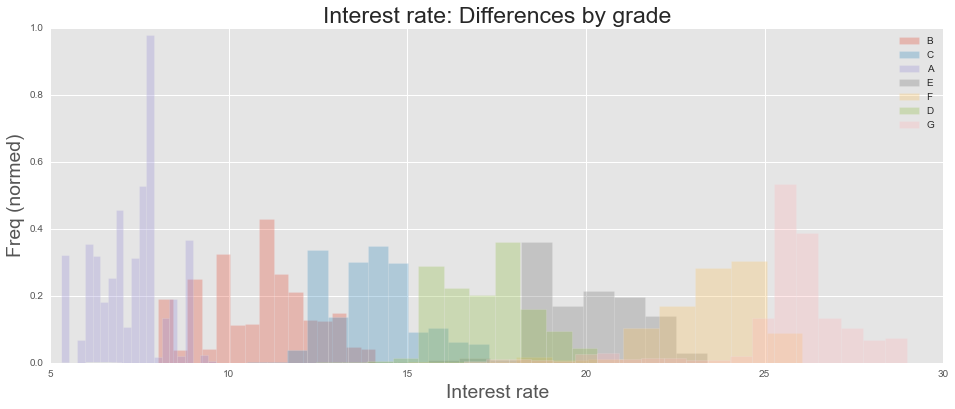

In [87]:
# By grade
for grade in df['grade'].unique():
    plt.hist(df[df['grade'] == grade]['int_rate'].values, bins = 20, normed = True, alpha = 0.3, label = grade)

plt.xlabel('Interest rate')
plt.ylabel('Freq (normed)')
plt.title('Interest rate: Differences by grade')
plt.legend()
plt.show()

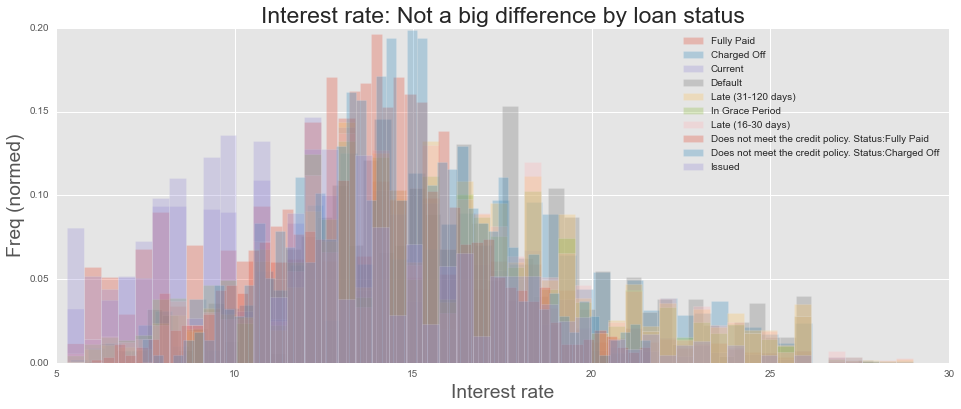

In [123]:
# By grade
for status in df['loan_status'].unique():
    plt.hist(df[df['loan_status'] == status]['int_rate'].values, bins = 50, \
             normed = True, alpha = 0.3, label = status)

plt.xlabel('Interest rate')
plt.ylabel('Freq (normed)')
plt.title('Interest rate: Not a big difference by loan status')
plt.legend()
plt.show()

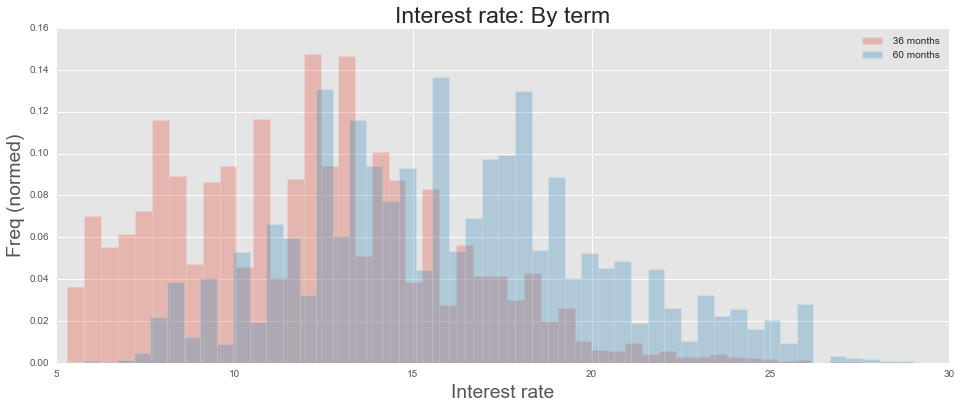

In [124]:
# By term
for term in df['term'].unique():
    plt.hist(df[df['term'] == term]['int_rate'].values, bins = 50, \
             normed = True, alpha = 0.3, label = term)

plt.xlabel('Interest rate')
plt.ylabel('Freq (normed)')
plt.title('Interest rate: By term')
plt.legend()
plt.show()

- Scatter plot: interest rate, number of inquiries?
- Scatter plot: interest rate, last_pymt_amnt

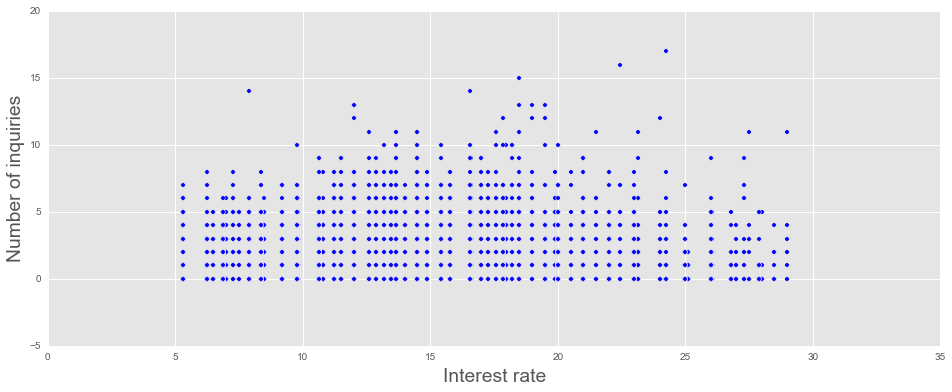

In [90]:
# Scatter plot: interest rate, number of inquiries?
plt.scatter(df['int_rate'], df['inq_fi'])
plt.xlabel('Interest rate')
plt.ylabel('Number of inquiries')
plt.show()

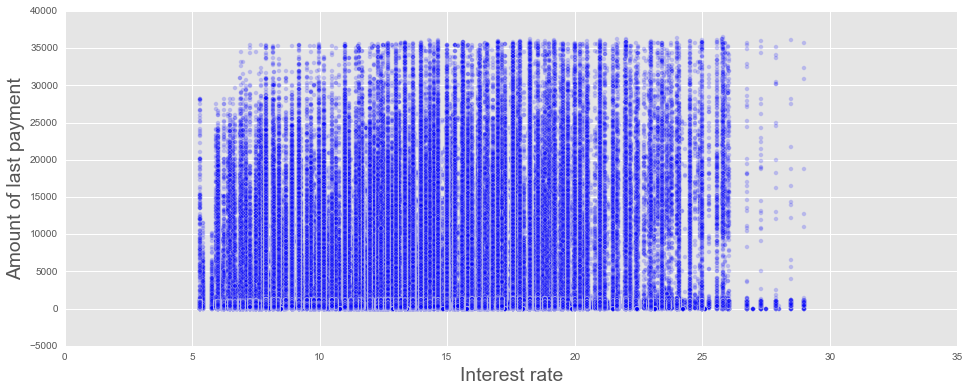

In [99]:
# Scatter plot: interest rate, number of inquiries?
# Not helpful!
plt.scatter(df['int_rate'], df['last_pymnt_amnt'], alpha = 0.2)
plt.xlabel('Interest rate')
plt.ylabel('Amount of last payment')
plt.show()

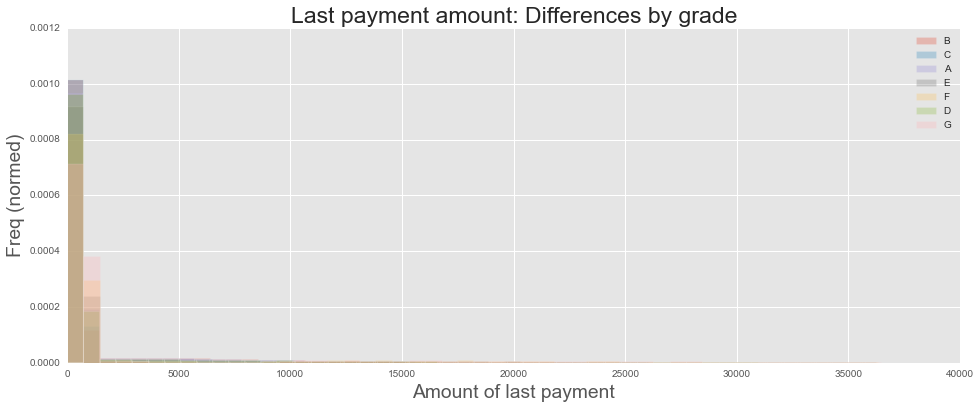

In [103]:
# By grade
for grade in df['grade'].unique():
    plt.hist(df[df['grade'] == grade]['last_pymnt_amnt'].values, bins = 50, \
             normed = True, alpha = 0.3, label = grade)

plt.xlabel('Amount of last payment')
plt.ylabel('Freq (normed)')
plt.title('Last payment amount: Differences by grade')
plt.legend()
plt.show()

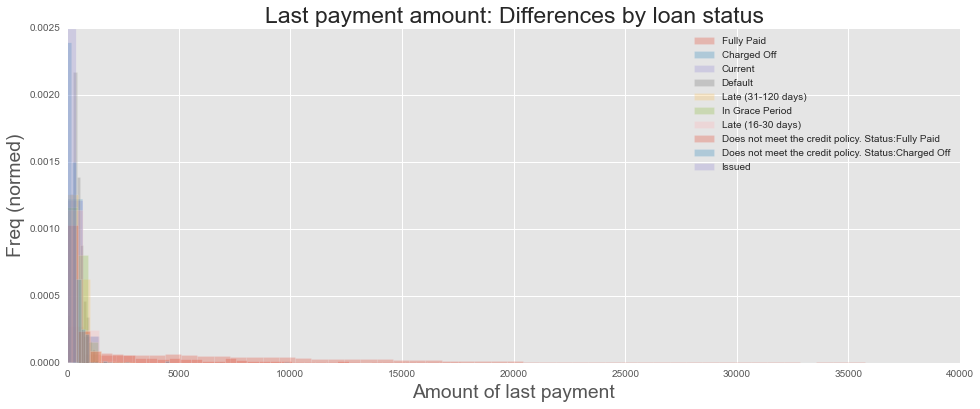

In [104]:
# By grade
for status in df['loan_status'].unique():
    plt.hist(df[df['loan_status'] == status]['last_pymnt_amnt'].values, bins = 50, \
             normed = True, alpha = 0.3, label = status)

plt.xlabel('Amount of last payment')
plt.ylabel('Freq (normed)')
plt.title('Last payment amount: Differences by loan status')
plt.legend()
plt.show()

- ~~Scatter plot: interest rate, number of payments (category by status?)~~
- Scatter plot: interest rate, tot_cur_bal (category by status?)

- Scatter plot: len(desc), interest rate (category by status?)

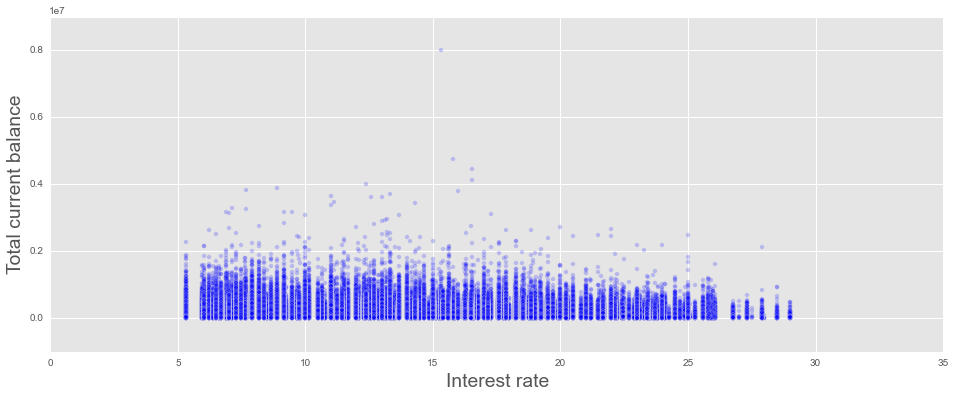

In [127]:
plt.scatter(df['int_rate'], df['tot_cur_bal'], alpha = 0.2)
plt.xlabel('Interest rate')
plt.ylabel('Total current balance')
plt.show()

- Bar chart: loan grades (with subgrades), ordered by grade

In [174]:
sgrades = df['sub_grade'].value_counts().reset_index()
sgrades = sgrades.sort('index').reset_index()
sgrades['grade'] = sgrades['index'].apply(lambda x: x[0])
sgrades.head()

,level_0,index,0,grade
0,17,A1,22913,A
1,18,A2,22485,A
2,16,A3,23457,A
3,12,A4,34531,A
4,9,A5,44816,A


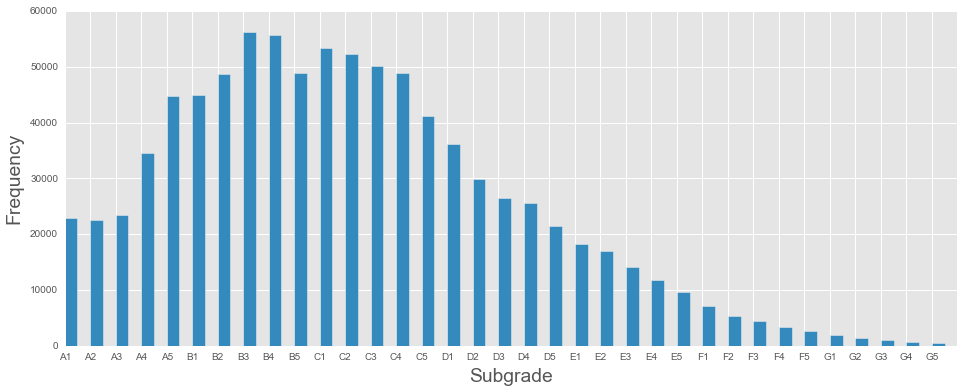

In [187]:
# TODO: Categorize by subgrade[0:1] and grade (all the As are one color, Bs are another)

colors = {'A': 'red',
          'B': 'blue',
          'C': 'green',
          'D': 'orange',
          'E': 'purple',
          'F': 'gray',
          'G': 'yellow'}

x = np.arange(len(sgrades['index']))
plt.bar(x, sgrades[0], width = 0.5)
plt.xticks(x, sgrades['index'])
plt.xlabel('Subgrade')
plt.ylabel('Frequency')
plt.show()

- Histogram: Debt-to-income ratio

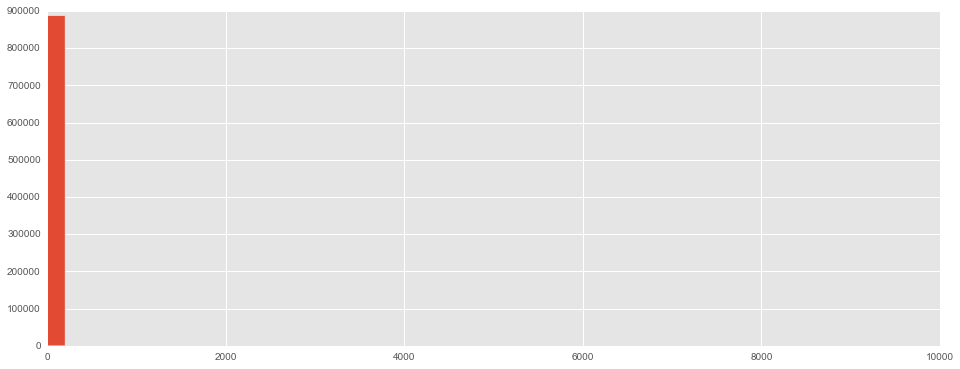

In [190]:
plt.hist(df['dti'], bins= 50)
plt.show()

In [198]:
# Data cleaning issue! I think this is just an outlier
print df[df['dti'] > 100].shape, df.shape
df2 = df[df['dti'] <= 100]

(11, 75) (887379, 75)


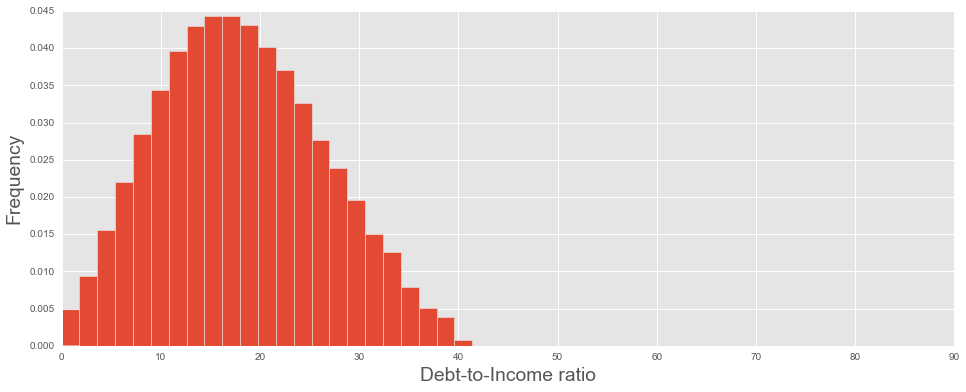

In [200]:
plt.hist(df2['dti'], bins= 50, normed = True)
plt.xlabel('Debt-to-Income ratio')
plt.ylabel('Frequency')
plt.show()

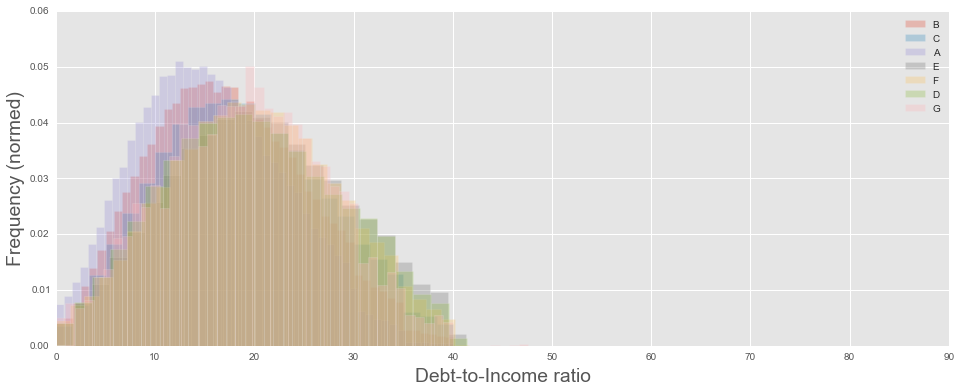

In [203]:
# By grade
for grade in df2['grade'].unique():
    plt.hist(df2[df2['grade'] == grade]['dti'].values, bins = 50, \
             normed = True, alpha = 0.3, label = grade)

plt.xlabel('Debt-to-Income ratio')
plt.ylabel('Frequency (normed)')
plt.legend()
plt.show()

- Histogram: Income-to-payment ratio.
- Histogram: ratio of current balance to high credit/credit limit (`il_util`).

In [209]:
df2['il_util'].describe()

count    18613.000000
mean        71.534471
std         23.024093
min          0.000000
25%         58.600000
50%         74.900000
75%         87.600000
max        223.300000
Name: il_util, dtype: float64

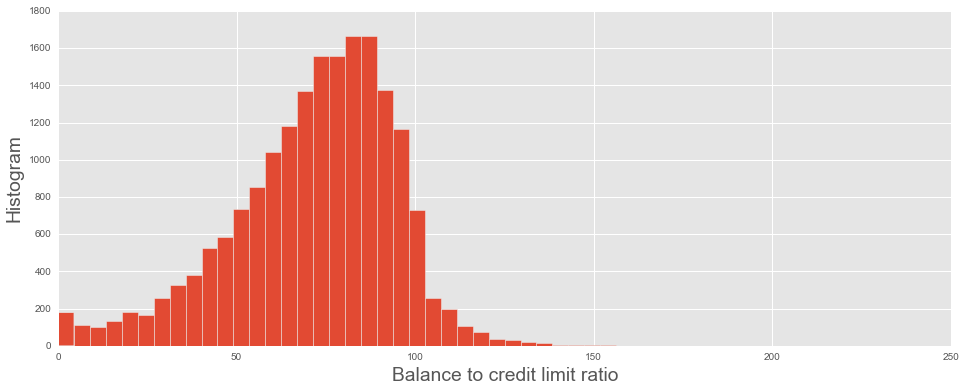

In [219]:
plt.hist(df2['il_util'].dropna().values, bins = 50)
plt.xlabel('Balance to credit limit ratio')
plt.ylabel('Histogram')
plt.show()

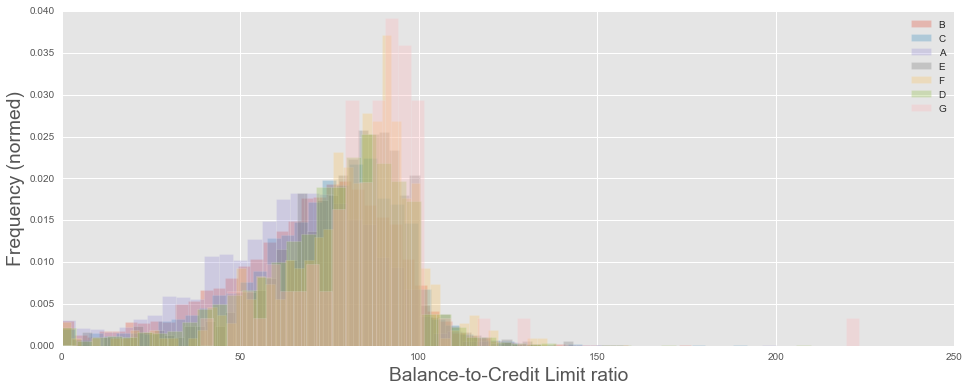

In [220]:
# By grade
for grade in df2['grade'].unique():
    plt.hist(df2[df2['grade'] == grade]['il_util'].dropna().values, bins = 50, \
             normed = True, alpha = 0.3, label = grade)

plt.xlabel('Balance-to-Credit Limit ratio')
plt.ylabel('Frequency (normed)')
plt.legend()
plt.show()

- Scatter plot: loan amount, interest rate (category by status? category by purpose?)
- Scatter plot: interest rate, term (category by status? purpose?)

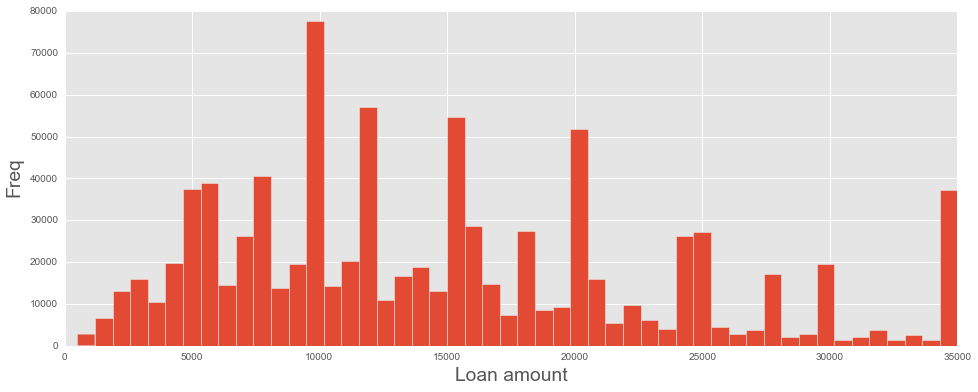

In [231]:
plt.hist(df2['loan_amnt'].values, bins = 50)
plt.xlabel('Loan amount')
plt.ylabel('Freq')
plt.show()

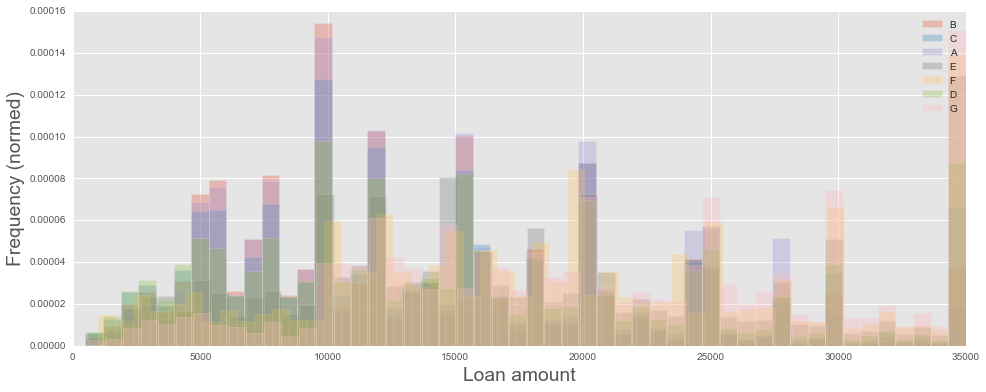

In [228]:
# By grade
for grade in df2['grade'].unique():
    plt.hist(df2[df2['grade'] == grade]['loan_amnt'].values, bins = 50, \
             normed = True, alpha = 0.3, label = grade)

plt.xlabel('Loan amount')
plt.ylabel('Frequency (normed)')
plt.legend()
plt.show()

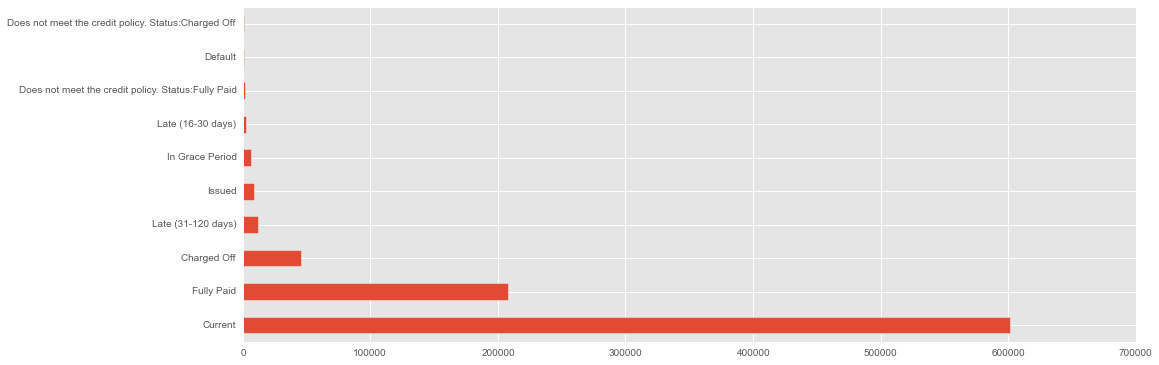

In [237]:
df['loan_status'].value_counts().plot(kind = 'barh')

- Correlation heatmap
    - Using only a subset of the features?

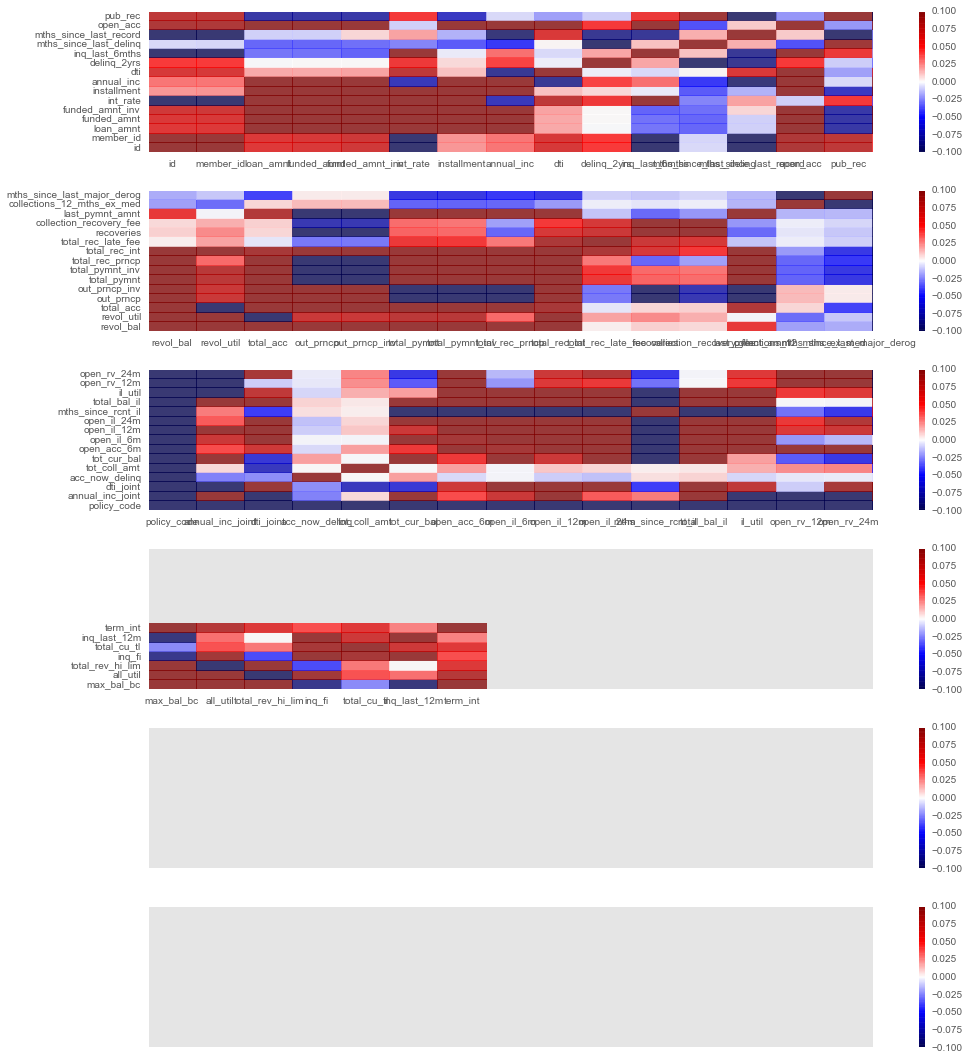

In [236]:
# subset of features
subset = []

# Correlation matrix
corrs = df.corr()

# Plotting it onto a heatmap
plt.subplots(6, 1, figsize=(15,15))

for i, n in enumerate(range(0, 76, 15)):
    plt.subplot(6, 1, i + 1)
    
    plt.pcolor(corrs, alpha=0.75, cmap = 'seismic')
    plt.yticks(np.arange(0.5, len(corrs.index), 1), corrs.index)
    plt.xticks(np.arange(0.5, len(corrs.columns), 1), corrs.columns)
    plt.xlim([n, n + 15])
    plt.ylim([n, n + 15])
    plt.colorbar()

plt.tight_layout()

In [42]:
df['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
dtype: int64